In [24]:
] activate .

  Activating project at `/media/dasc3/SAMSUNG_SSD/dasc3/devansh/nvblox-accuracy-testing/vslam-nvblox/ros_ws/src/dasc_nvblox/nvblox/nvblox`


In [577]:
include("julia_utils/vis_helper.jl")

Main.VisHelper

In [578]:
using PlyIO
using Plots
using MeshCat
using GeometryBasics
using .VisHelper
VH = VisHelper

Main.VisHelper

In [4]:
# start a visualizer
vis = Visualizer()

[ Info: Listening on: 127.0.0.1:8700, thread id: 2
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8700


MeshCat Visualizer with path /meshcat at http://127.0.0.1:8700

In [579]:
delete!(vis)

MeshCat Visualizer with path /meshcat at http://127.0.0.1:8700

In [580]:
# visualize the mesh

In [581]:
pwd()

"/media/dasc3/SAMSUNG_SSD/dasc3/devansh/nvblox-accuracy-testing/vslam-nvblox/ros_ws/src/dasc_nvblox/nvblox/nvblox"

In [582]:
root_dir = "/media/dasc3/SAMSUNG_SSD/dasc3/devansh/nvblox-accuracy-testing/"

"/media/dasc3/SAMSUNG_SSD/dasc3/devansh/nvblox-accuracy-testing/"

In [583]:
gt_mesh_file = root_dir * "/data/Replica/office3_mesh.ply"

pert_mesh = "./eval_results/office3/1e-5/mesh.ply"

"./eval_results/office3/1e-5/mesh.ply"

In [584]:
gt_mesh = load_ply(gt_mesh_file)

Ply with header:
 ply
 format binary_little_endian 1.0
 element vertex 1187140
 property float32 x
 property float32 y
 property float32 z
 property float32 nx
 property float32 ny
 property float32 nz
 property uint8 red
 property uint8 green
 property uint8 blue
 element face 1185992
 property list uint8 int32 vertex_indices
 end_header

In [689]:
gt_mesh_pc = VH.mesh2PointCloud(gt_mesh; cut_ceiling=0, color=RGBA(0,0,0, 0.1))

PointCloud{Float32, Point{3, Float32}, RGBA{Float64}}(Point{3, Float32}[[-2.3487387, 0.18608984, -1.1850749], [-2.3554428, 0.19231752, -1.1824145], [-2.3642616, 0.18439144, -1.1812334], [-2.3581295, 0.17853868, -1.1841388], [-2.3464444, 0.20279224, -1.1833026], [-2.3392482, 0.1954318, -1.1856443], [-2.3476453, 0.18785612, -1.1762583], [-2.3552165, 0.17701825, -1.1741682], [-2.3730807, 0.17646535, -1.1800524], [-2.3675208, 0.17098749, -1.1832027]  …  [1.6683588, -1.5410032, -1.1954991], [1.6683589, -1.5410031, -1.1954992], [1.6762792, -1.5496393, -1.1953294], [1.6682639, -1.5495577, -1.1953709], [1.6602485, -1.5494761, -1.1954123], [1.5316036, -1.6628859, -1.1946058], [1.5293722, -1.6681741, -1.1947782], [1.5218673, -1.6658504, -1.1944952], [1.5258565, -1.6630996, -1.1944747], [1.5240986, -1.6605623, -1.194323]], RGBA{Float64}[RGBA(0.0, 0.0, 0.0, 0.1), RGBA(0.0, 0.0, 0.0, 0.1), RGBA(0.0, 0.0, 0.0, 0.1), RGBA(0.0, 0.0, 0.0, 0.1), RGBA(0.0, 0.0, 0.0, 0.1), RGBA(0.0, 0.0, 0.0, 0.1), RGBA(0

In [690]:
VH.draw_pointcloud!(vis["gt_mesh_pc"], gt_mesh_pc; size=0.005f0, alpha=0.5)

MeshCat Visualizer with path /meshcat/gt_mesh_pc at http://127.0.0.1:8700

In [691]:
gt_plymesh = VH.PlyMesh(gt_mesh)# ; color=RGB(0.8,0.8,0.8))

Main.VisHelper.PlyMesh{Float32, Int32, Float64}(Point{3, Float32}[[-2.3487387, 0.18608984, -1.1850749], [-2.3554428, 0.19231752, -1.1824145], [-2.3642616, 0.18439144, -1.1812334], [-2.3581295, 0.17853868, -1.1841388], [-2.3464444, 0.20279224, -1.1833026], [-2.3392482, 0.1954318, -1.1856443], [-2.3476453, 0.18785612, -1.1762583], [-2.3552165, 0.17701825, -1.1741682], [-2.3730807, 0.17646535, -1.1800524], [-2.3675208, 0.17098749, -1.1832027]  …  [1.6683588, -1.5410032, -1.1954991], [1.6683589, -1.5410031, -1.1954992], [1.6762792, -1.5496393, -1.1953294], [1.6682639, -1.5495577, -1.1953709], [1.6602485, -1.5494761, -1.1954123], [1.5316036, -1.6628859, -1.1946058], [1.5293722, -1.6681741, -1.1947782], [1.5218673, -1.6658504, -1.1944952], [1.5258565, -1.6630996, -1.1944747], [1.5240986, -1.6605623, -1.194323]], TriangleFace{Int32}[TriangleFace{Int32}(1, 2, 3), TriangleFace{Int32}(3, 4, 1), TriangleFace{Int32}(5, 2, 1), TriangleFace{Int32}(1, 6, 5), TriangleFace{Int32}(3, 2, 7), TriangleFace

In [692]:
# VH.draw_pointcloud!(vis["gt_mesh_pc"], gt_plymesh; )

In [693]:
gt_plymesh_cut = VH.cut_ceiling(gt_plymesh,0)

Main.VisHelper.PlyMesh{Float32, Int32, Float64}(Point{3, Float32}[[-2.3487387, 0.18608984, -1.1850749], [-2.3554428, 0.19231752, -1.1824145], [-2.3642616, 0.18439144, -1.1812334], [-2.3581295, 0.17853868, -1.1841388], [-2.3464444, 0.20279224, -1.1833026], [-2.3392482, 0.1954318, -1.1856443], [-2.3476453, 0.18785612, -1.1762583], [-2.3552165, 0.17701825, -1.1741682], [-2.3730807, 0.17646535, -1.1800524], [-2.3675208, 0.17098749, -1.1832027]  …  [1.6683588, -1.5410032, -1.1954991], [1.6683589, -1.5410031, -1.1954992], [1.6762792, -1.5496393, -1.1953294], [1.6682639, -1.5495577, -1.1953709], [1.6602485, -1.5494761, -1.1954123], [1.5316036, -1.6628859, -1.1946058], [1.5293722, -1.6681741, -1.1947782], [1.5218673, -1.6658504, -1.1944952], [1.5258565, -1.6630996, -1.1944747], [1.5240986, -1.6605623, -1.194323]], TriangleFace{Int32}[TriangleFace{Int32}(1, 2, 3), TriangleFace{Int32}(3, 4, 1), TriangleFace{Int32}(5, 2, 1), TriangleFace{Int32}(1, 6, 5), TriangleFace{Int32}(3, 2, 7), TriangleFace

In [694]:
VH.draw_mesh!(vis["gt_mesh"], gt_plymesh_cut; alpha=0.5)

MeshCat Visualizer with path /meshcat/gt_mesh at http://127.0.0.1:8700

In [608]:
# grab the estimated mesh

In [644]:
estimated_mesh_path = "./vis_results/2000/transformed_mesh.ply"
estimated_cmesh_path = "./vis_results/2000/transformed_certified_mesh.ply"

"./vis_results/2000/transformed_certified_mesh.ply"

In [645]:
estimated_mesh = load_ply(estimated_mesh_path)
estimated_cmesh = load_ply(estimated_cmesh_path)

Ply with header:
 ply
 format ascii 1.0
 element vertex 75677
 property float32 x
 property float32 y
 property float32 z
 property float32 nx
 property float32 ny
 property float32 nz
 element face 112771
 property list uint8 int32 vertex_indices
 end_header

In [646]:
VH.draw_mesh!(vis["estimated_mesh_2"], VH.PlyMesh(estimated_mesh; color=RGB(1,0,0), is_trimesh=true); alpha=1.0)

VH.draw_mesh!(vis["estimated_cmesh_2"], VH.PlyMesh(estimated_cmesh; color=RGB(0,1,0), is_trimesh=true); alpha=1.0)

MeshCat Visualizer with path /meshcat/estimated_cmesh_2 at http://127.0.0.1:8700

In [647]:
VH.draw_pointcloud!(vis["estimated_mesh"], 
    VH.mesh2PointCloud(estimated_mesh; cut_ceiling=1.2, color=safe_color = rgba(100, 190, 80, 1)); 
    size=0.02f0)
VH.draw_pointcloud!(vis["estimated_cmesh"], 
    VH.mesh2PointCloud(estimated_cmesh; cut_ceiling=1.2, color=safe_color = rgba(100, 190, 80, 1)))

MeshCat Visualizer with path /meshcat/estimated_cmesh at http://127.0.0.1:8700

In [648]:

# grab the esdf

In [695]:
esdf_file = "./vis_results/1/transformed_esdf.ply"
cesdf_file = "./vis_results/1/transformed_certified_esdf.ply"

"./vis_results/1/transformed_certified_esdf.ply"

In [696]:
esdf_ply = load_ply(esdf_file)
cesdf_ply = load_ply(cesdf_file)

Ply with header:
 ply
 format ascii 1.0
 element vertex 6445568
 property float32 x
 property float32 y
 property float32 z
 property float32 intensity
 end_header

In [697]:
function slice_ply(ply::PlyIO.Ply; z_lims=(-Inf, Inf), intensity_lims=(-Inf, Inf))
    
    il, iu = intensity_lims
    zl, zu = z_lims
    
    intensities = ply["vertex"]["intensity"]
    zs = ply["vertex"]["z"]
    
    N = length(intensities)
    
    good_inds = map( i -> (il <= intensities[i] <= iu) && (zl <= zs[i] <= zu), 1:N)
    
    new_ply = Ply()
    new_vertex = PlyElement("vertex",
            ArrayProperty("x", ply["vertex"]["x"][good_inds]),
            ArrayProperty("y", ply["vertex"]["y"][good_inds]),
            ArrayProperty("z", ply["vertex"]["z"][good_inds]),
            ArrayProperty("intensity", ply["vertex"]["intensity"][good_inds])
    )
    
    push!(new_ply, new_vertex)
    
    return new_ply
end

slice_ply (generic function with 1 method)

In [698]:
# esdf_ply_sliced = slice_ply(esdf_ply; z_lims=((-0.01, 0.01) .+ -0.3), intensity_lims=(0.00, 0.1))

# esdf_ply_sliced = slice_ply(esdf_ply; z_lims=(-Inf, Inf), intensity_lims=(0.002, 0.1))
    
# # esdf_ply_sliced = slice_ply(esdf_ply; z_lims=(-0.85,-0.84), intensity_lims=(0.001, 1.02))
    
# esdf_ply_sliced = slice_ply(esdf_ply; z_lims=(-0.22, -0.2), intensity_lims=(0.002, 0.1))
# cesdf_ply_sliced = slice_ply(cesdf_ply; z_lims=(-0.22, -0.2), intensity_lims=(0.002, 0.1))
        
esdf_ply_sliced = slice_ply(esdf_ply; z_lims=(-0.62, -0.6), intensity_lims=(0.001, 1.1))
cesdf_ply_sliced = slice_ply(cesdf_ply; z_lims=(-0.62, -0.6), intensity_lims=(0.001, 1.1))
    
    
# esdf_ply_sliced = slice_ply(esdf_ply; z_lims=(-Inf, Inf), intensity_lims=(-0.01, 0.0))    

Ply with header:
 ply
 format ascii 1.0
 element vertex 22889
 property float32 x
 property float32 y
 property float32 z
 property float32 intensity
 end_header

In [699]:
function binary_colored_sdf(ply::PlyIO.Ply, threshold, color_lo, color_hi)
    intensities = ply["vertex"]["intensity"]
    
    colors = map( i -> (i >= threshold ? color_hi : color_lo), intensities )
    x = ply["vertex"]["x"]
    y = ply["vertex"]["y"]    
    z = ply["vertex"]["z"]     
    
    pts = map( (x,y, z) -> Point3f(x,y,z), x, y, z)
    
    return PointCloud(pts, colors)
end
    

binary_colored_sdf (generic function with 1 method)

In [700]:
rgba(r,g,b,a) = RGBA(r/255, g/255, b/255, a)

rgba (generic function with 1 method)

In [701]:
# unsafe_color = RGBA(253/255, 152/255, 145/255, 1)
unsafe_color = RGB(194/255, 81/255, 1/255)
unsafe_color = RGB(1.0,0.2,0)

safe_color = RGBA(43/255, 187/255, 127/255, 1)
#safe_color = RGBA(179/255, 223/255, 115/255, 1)


safe_color = rgba(216, 227, 166, 1)
# unsafe_color = rgba(20, 88, 137, 1)
unsafe_color = rgba(6, 51, 93, 1)
# unsafe_color = RGB(0.8, 0.8, 0.8)

unsafe_color = rgba(6, 0, 93, 1)
# unsafe_color = rgba(60, 0, 10, 1)

safe_color = rgba(100, 190, 80, 1)


binary_esdf = binary_colored_sdf(esdf_ply_sliced, 0.04, unsafe_color, safe_color)
binary_cesdf = binary_colored_sdf(cesdf_ply_sliced, 0.04, unsafe_color, safe_color)


PointCloud{Float32, Point{3, Float32}, RGBA{Float64}}(Point{3, Float32}[[1.93, -0.45, -0.61], [1.93, -0.43, -0.61], [1.93, -0.41, -0.61], [1.93, -0.39, -0.61], [1.93, -0.37, -0.61], [1.93, -0.35, -0.61], [1.93, -0.33, -0.61], [1.95, -0.45, -0.61], [1.95, -0.43, -0.61], [1.95, -0.41, -0.61]  …  [1.55, 1.33, -0.61], [1.55, 1.35, -0.61], [1.55, 1.37, -0.61], [1.57, 1.29, -0.61], [1.57, 1.31, -0.61], [1.57, 1.33, -0.61], [1.57, 1.35, -0.61], [1.59, 1.29, -0.61], [1.59, 1.31, -0.61], [1.59, 1.33, -0.61]], RGBA{Float64}[RGBA(0.023529411764705882, 0.0, 0.36470588235294116, 1.0), RGBA(0.023529411764705882, 0.0, 0.36470588235294116, 1.0), RGBA(0.023529411764705882, 0.0, 0.36470588235294116, 1.0), RGBA(0.023529411764705882, 0.0, 0.36470588235294116, 1.0), RGBA(0.023529411764705882, 0.0, 0.36470588235294116, 1.0), RGBA(0.023529411764705882, 0.0, 0.36470588235294116, 1.0), RGBA(0.023529411764705882, 0.0, 0.36470588235294116, 1.0), RGBA(0.023529411764705882, 0.0, 0.36470588235294116, 1.0), RGBA(0.0

In [702]:

VH.draw_pointcloud!(vis["1"]["slice_esdf"], binary_esdf; size=0.02f0, alpha=0.75)
VH.draw_pointcloud!(vis["1"]["slice_cesdf"], binary_cesdf; size=0.02f0, alpha=0.75)

MeshCat Visualizer with path /meshcat/1/slice_cesdf at http://127.0.0.1:8700

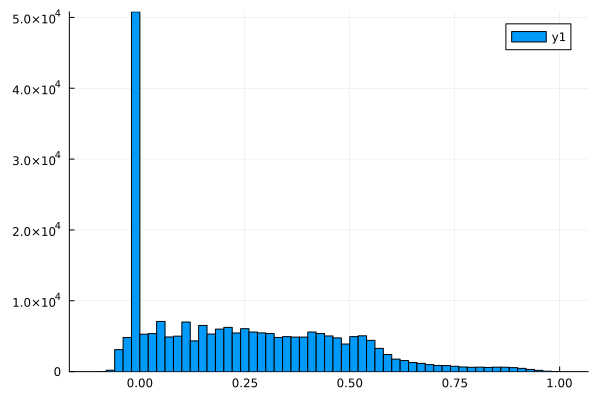

In [93]:
histogram(esdf_ply_sliced["vertex"]["intensity"])

In [94]:
VH.draw_pointcloud!(vis["slice"], VH.sdf2PointCloud(esdf_ply_sliced; intensitylims=(-0.1, 1.0)))

MeshCat Visualizer with path /meshcat/slice at http://127.0.0.1:8700

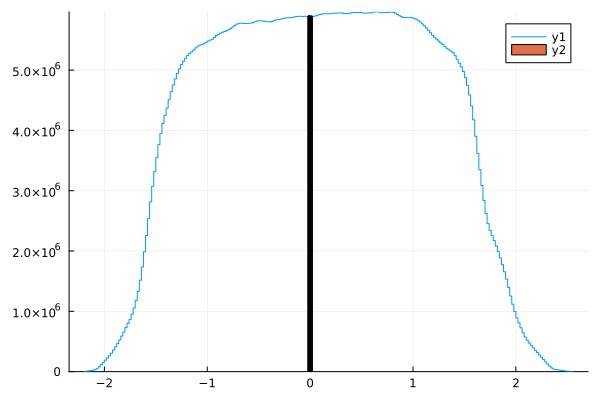

In [81]:
histogram(esdf_ply["vertex"]["z"], normalize=:density)
histogram!(esdf_ply_sliced["vertex"]["z"],  normalize=:density)

In [59]:
supertype(PointCloud)

GeometryBasics.AbstractGeometry{3, T} where T

In [62]:
typeof(gt_mesh_pc.color)

Vector{RGB{Float64}} (alias for Array{ColorTypes.RGB{Float64}, 1})

In [703]:
# load the trajectory

In [707]:
] add CSV

   Resolving package versions...
   Installed WeakRefStrings ── v1.4.2
   Installed WorkerUtilities ─ v1.6.1
   Installed SentinelArrays ── v1.4.8
   Installed FilePathsBase ─── v0.9.22
   Installed CSV ───────────── v0.10.15
    Updating `/media/dasc3/SAMSUNG_SSD/dasc3/devansh/nvblox-accuracy-testing/vslam-nvblox/ros_ws/src/dasc_nvblox/nvblox/nvblox/Project.toml`
  [336ed68f] + CSV v0.10.15
    Updating `/media/dasc3/SAMSUNG_SSD/dasc3/devansh/nvblox-accuracy-testing/vslam-nvblox/ros_ws/src/dasc_nvblox/nvblox/nvblox/Manifest.toml`
  [336ed68f] + CSV v0.10.15
  [48062228] + FilePathsBase v0.9.22
  [842dd82b] + InlineStrings v1.4.2
  [2dfb63ee] + PooledArrays v1.4.3
  [91c51154] + SentinelArrays v1.4.8
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
  [9fa8497b] + Future v1.11.0
Precompiling project...
    629.8 ms  ✓ WorkerUtilities
    510.7 ms  ✓ PooledArrays
    687.4 ms  ✓ WeakRefStrings
    959.3 ms  ✓ FilePathsBase
   1109.5 ms  ✓ SentinelArrays
    513.

In [742]:
using CSV, LinearAlgebra

In [743]:
traj_file = "./../../../../../../data/Replica/office3/traj.txt"

"./../../../../../../data/Replica/office3/traj.txt"

In [744]:
traj_csv = CSV.File(traj_file) |> collect

1999-element Vector{CSV.Row}:
 CSV.Row: (var"4.456140525615527315e-01" = 0.43989516545105495, var"-2.210077213462413315e-01" = -0.22452120742122125, var"8.675158230631944134e-01" = 0.8695300287114333, var"-9.393218179845449489e-01" = -0.9423335712313682, var"-8.952251762320302397e-01" = -0.8980491319592648, var"-1.100104744272376867e-01" = -0.10997816285435578, var"4.318212354164908118e-01" = 0.4259255337290685, var"-2.637977168242612525e+00" = -2.6180897234037634, var"1.186741061501003696e-16" = 1.1857560221685788e-16, var"-9.690476162819019468e-01" = -0.9682432706263947, var"-2.468738896245687431e-01" = -0.2500099375758937, var"6.196026833231903508e-01" = 0.650273912859065, var"0.000000000000000000e+00" = 0.0, var"0.000000000000000000e+00_1" = 0.0, var"0.000000000000000000e+00_2" = 0.0, var"1.000000000000000000e+00" = 1.0)
 CSV.Row: (var"4.456140525615527315e-01" = 0.434785942750048, var"-2.210077213462413315e-01" = -0.2275594071270936, var"8.675158230631944134e-01" = 0.8713081545669

In [762]:
traj = map( t->Matrix{Float64}(reshape(t |> collect, (4,4))'), traj_csv)
# traj1 = diagm(ones(4))
# pushfirst!(traj, traj1)

1999-element Vector{Matrix{Float64}}:
 [0.43989516545105495 -0.22452120742122125 0.8695300287114333 -0.9423335712313682; -0.8980491319592648 -0.10997816285435578 0.4259255337290685 -2.6180897234037634; 1.1857560221685788e-16 -0.9682432706263947 -0.2500099375758937 0.650273912859065; 0.0 0.0 0.0 1.0]
 [0.434785942750048 -0.2275594071270936 0.8713081545669807 -0.9441591252984481; -0.9005338327830621 -0.10986775594385689 0.42067551891797683 -2.6003260772963728; 1.1849024475446782e-16 -0.967546274051958 -0.2526939009318849 0.6780601875487743; 0.0 0.0 0.0 1.0]
 [0.430288841869337 -0.23012705833209396 0.8728648518448671 -0.9448560597908865; -0.9026912609318564 -0.10969542932130949 0.4160713883737608 -2.5846003316794484; 1.1841824477136926e-16 -0.9669583495732537 -0.2549344037013627 0.7030598097252909; 0.0 0.0 0.0 1.0]
 [0.42640412713080444 -0.23223000637539273 0.8742132145562099 -0.9444819543137867; -0.9045327635668134 -0.10947512036115006 0.41211124427282364 -2.5708265883120025; 1.183597165

In [764]:
path_500 = [T[1:3, 4] for T in traj[1:500]]
path_1000 = [T[1:3, 4] for T in traj[1:1000]]
path_1500 = [T[1:3, 4] for T in traj[1:1500]]
path_2000 = [T[1:3, 4] for T in traj[1:1999]]


1999-element Vector{Vector{Float64}}:
 [-0.9423335712313682, -2.6180897234037634, 0.650273912859065]
 [-0.9441591252984481, -2.6003260772963728, 0.6780601875487743]
 [-0.9448560597908865, -2.5846003316794484, 0.7030598097252909]
 [-0.9444819543137867, -2.5708265883120025, 0.725371081721589]
 [-0.9430943884722507, -2.558918948953042, 0.7450923058706419]
 [-0.9407509418713805, -2.5487915153615774, 0.7623217845054224]
 [-0.9375091941162791, -2.540358389296616, 0.7771578199589046]
 [-0.9334267248120472, -2.5335336725171658, 0.7896987145640609]
 [-0.9285611135637889, -2.528231466782238, 0.8000427706538653]
 [-0.9229699399766058, -2.52436587385084, 0.8082882905612911]
 [-0.9167107836556001, -2.5218509954819814, 0.8145335766193115]
 [-0.9098412242058743, -2.520600933434671, 0.8188769311608999]
 [-0.9024188412325306, -2.520529789467916, 0.8214166565190294]
 ⋮
 [-1.6786265803842606, -2.960882088741949, 0.746926337099939]
 [-1.6684613225722296, -2.9761551416464425, 0.7458190350919582]
 [-1.65814

In [765]:
pc_500 = PointCloud(map(i->Point3f(i), path_500), map(i->RGB(1,0,0), path_500))
pc_1000 = PointCloud(map(i->Point3f(i), path_1000), map(i->RGB(1,0,0), path_1000))    
pc_1500 = PointCloud(map(i->Point3f(i), path_1500), map(i->RGB(1,0,0), path_1500))
pc_2000 = PointCloud(map(i->Point3f(i), path_2000), map(i->RGB(1,0,0), path_2000))    

PointCloud{Float32, Point{3, Float32}, RGB{FixedPointNumbers.N0f8}}(Point{3, Float32}[[-0.9423336, -2.6180897, 0.6502739], [-0.94415915, -2.600326, 0.6780602], [-0.94485605, -2.5846004, 0.7030598], [-0.94448197, -2.5708265, 0.72537106], [-0.9430944, -2.558919, 0.74509233], [-0.94075096, -2.5487914, 0.76232177], [-0.9375092, -2.5403583, 0.77715784], [-0.93342674, -2.5335336, 0.7896987], [-0.9285611, -2.5282314, 0.80004275], [-0.92296994, -2.524366, 0.8082883]  …  [-1.6581485, -2.9914608, 0.74471974], [-1.6476877, -3.0067992, 0.74362874], [-1.6370782, -3.0221705, 0.74254614], [-1.6263194, -3.0375745, 0.7414721], [-1.6154108, -3.053012, 0.740407], [-1.6043518, -3.0684824, 0.7393508], [-1.5931418, -3.083986, 0.73830384], [-1.5817802, -3.099523, 0.73726624], [-1.5702665, -3.1150935, 0.73623824], [-1.5586001, -3.1306977, 0.73522]], RGB{FixedPointNumbers.N0f8}[RGB(1.0, 0.0, 0.0), RGB(1.0, 0.0, 0.0), RGB(1.0, 0.0, 0.0), RGB(1.0, 0.0, 0.0), RGB(1.0, 0.0, 0.0), RGB(1.0, 0.0, 0.0), RGB(1.0, 0.0, 

In [766]:
VH.draw_pointcloud!(vis["path_500"], pc_500)
VH.draw_pointcloud!(vis["path_1000"], pc_1000)
VH.draw_pointcloud!(vis["path_1500"], pc_1500)
VH.draw_pointcloud!(vis["path_2000"], pc_2000)

MeshCat Visualizer with path /meshcat/path_2000 at http://127.0.0.1:8700

In [767]:
VH.draw_pose!(vis["pose_1"], traj[1]; size=0.2)
VH.draw_pose!(vis["pose_500"], traj[500]; size=0.2)
VH.draw_pose!(vis["pose_1000"], traj[1000]; size=0.2)
VH.draw_pose!(vis["pose_1500"], traj[1500]; size=0.2)
VH.draw_pose!(vis["pose_2000"], traj[1999]; size=0.2)

MeshCat Visualizer with path /meshcat/pose_2000 at http://127.0.0.1:8700